# Notebook to Create the `Job Completion Time` CSV File

In [1]:
import pandas as pd
from pathlib import Path
import os

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
OUTPUT_BASE_FILE_PATH = Path("Only Megha")

In [3]:
# "GOOG_sub_trace_10k_4_25"
# "GOOG_sub_trace_50k_10GM_50LM"
# "New_GOOG_sub_trace_50k_10GM_50LM"
# "New_GOOG_sub_trace_50k_4GM_25LM"
# "sparrow_GOOG_subtrace_50_000.csv"

CENTRALISED_BASE_FILE_PATH = Path("New_GOOG_sub_trace_10k_1GM_1LM")
CENTRALISED_CSV_FILE_NAME = [f for f in os.listdir(CENTRALISED_BASE_FILE_PATH)
                                 if os.path.isfile(CENTRALISED_BASE_FILE_PATH / Path(f)) and f.endswith("_jobs_info.csv")][0]  # "record-2022-01-05-14-54-13_jobs_info.csv"

DISTRIBUTED_BASE_FILE_PATH = Path("New_GOOG_sub_trace_10k_4GM_25LM")
DISTRIBUTED_CSV_FILE_NAME = [f for f in os.listdir(DISTRIBUTED_BASE_FILE_PATH)
                                 if os.path.isfile(DISTRIBUTED_BASE_FILE_PATH / Path(f)) and f.endswith("_jobs_info.csv")][0]  # "record-2021-12-09-21-03-12_jobs_info.csv"

NETWORK_DELAY = 0.0005

IS_YAHOO_TRACE_10K_4GM_25LM_DISTRIBUTED = False

In [4]:
CSV_FILE_COLUMN_NAME_LIST = ["Job ID", "Task ID", "Job Arrival Time",
                             "Task Launch Time", "Task Duration (Trace)",
                             "Task End Time On Node"]

# Loading the Centralised CSV File

In [5]:
CENTRALISED_CSV_FILE_PATH = CENTRALISED_BASE_FILE_PATH / Path(CENTRALISED_CSV_FILE_NAME)

centralised_df = pd.read_csv(CENTRALISED_CSV_FILE_PATH)

centralised_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
0,1,1,281294.20,281294.201,79782,79782.0015,0.001,361076.2015
1,1,2,281294.20,281294.201,80279,80279.0015,0.001,361573.2015
2,1,3,281294.20,281294.201,78543,78543.0015,0.001,359837.2015
3,1,4,281294.20,281294.201,79460,79460.0015,0.001,360754.2015
4,1,5,281294.20,281294.201,84355,84355.0015,0.001,365649.2015
...,...,...,...,...,...,...,...,...
312553,9997,17,299997.93,300006.433,53,61.5035,8.503,300059.4335
312554,9997,18,299997.93,300006.623,43,51.6935,8.693,300049.6235
312555,9998,1,299997.94,299999.643,186,187.7035,1.703,300185.6435
312556,9999,1,299997.95,299999.645,187,188.6955,1.695,300186.6455


In [6]:
centralised_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Launch Time         float64
Task Duration (Trace)      int64
Task Duration (GM)       float64
Task Queuing Delay       float64
Task End Time On Node    float64
dtype: object

# Loading the Distributed CSV File

In [7]:
DISTRIBUTED_CSV_FILE_PATH = DISTRIBUTED_BASE_FILE_PATH / Path(DISTRIBUTED_CSV_FILE_NAME)
distributed_df = pd.read_csv(DISTRIBUTED_CSV_FILE_PATH)

# ONLY FOR THE YAHOO TRACE
if IS_YAHOO_TRACE_10K_4GM_25LM_DISTRIBUTED:
    distributed_df["Task End Time On Node"] = distributed_df["Task End Time On Node"] + NETWORK_DELAY
    # distributed_df["Task Launch Time"] = distributed_df["Task Launch Time"] + NETWORK_DELAY  # Though correct, it is not needed here!

distributed_df

,Job ID,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
0,1,1,281294.20,281294.201,79782,79782.0015,0.001,361076.2015
1,1,2,281294.20,281294.201,80279,80279.0015,0.001,361573.2015
2,1,3,281294.20,281294.201,78543,78543.0015,0.001,359837.2015
3,1,4,281294.20,281294.201,79460,79460.0015,0.001,360754.2015
4,1,5,281294.20,281294.201,84355,84355.0015,0.001,365649.2015
...,...,...,...,...,...,...,...,...
312553,9997,17,299997.93,300004.631,53,59.7015,6.701,300057.6315
312554,9997,18,299997.93,300004.833,43,49.9035,6.903,300047.8335
312555,9998,1,299997.94,300683.025,186,871.0855,685.085,300869.0255
312556,9999,1,299997.95,300683.039,187,872.0895,685.089,300870.0395


In [8]:
distributed_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Launch Time         float64
Task Duration (Trace)      int64
Task Duration (GM)       float64
Task Queuing Delay       float64
Task End Time On Node    float64
dtype: object

# Extracting Required Columns from the Megha Dataframe to create the Ideal Dataframe

In [9]:
ideal_df = distributed_df[['Job ID', 'Task ID', 'Job Arrival Time', 'Task Duration (Trace)']].copy()
ideal_df["Task End Time On Node"] = ideal_df["Job Arrival Time"] + ideal_df["Task Duration (Trace)"]

ideal_df

,Job ID,Task ID,Job Arrival Time,Task Duration (Trace),Task End Time On Node
0,1,1,281294.20,79782,361076.20
1,1,2,281294.20,80279,361573.20
2,1,3,281294.20,78543,359837.20
3,1,4,281294.20,79460,360754.20
4,1,5,281294.20,84355,365649.20
...,...,...,...,...,...
312553,9997,17,299997.93,53,300050.93
312554,9997,18,299997.93,43,300040.93
312555,9998,1,299997.94,186,300183.94
312556,9999,1,299997.95,187,300184.95


In [10]:
ideal_df.dtypes

Job ID                     int64
Task ID                    int64
Job Arrival Time         float64
Task Duration (Trace)      int64
Task End Time On Node    float64
dtype: object

---

# Centralised Job Completion Time

In [11]:
centralised_job_completion_time_df = centralised_df.groupby("Job ID").max("Task End Time On Node")

centralised_job_completion_time_df

,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
Job ID,,,,,,,
1,45,281294.20,281294.201,86237,86237.0015,0.001,367531.2015
2,8,284907.60,284907.601,71316,71316.0015,0.001,356223.6015
3,1,286600.60,286600.601,43975,43975.0015,0.001,330575.6015
4,4,286773.60,286773.601,56642,56642.0015,0.001,343415.6015
5,1,288147.40,288147.401,47038,47038.0015,0.001,335185.4015
...,...,...,...,...,...,...,...
9996,1,299997.92,299999.633,201,202.7135,1.713,300200.6335
9997,18,299997.93,300006.623,164,171.6835,8.693,300169.6135
9998,1,299997.94,299999.643,186,187.7035,1.703,300185.6435


# Distributed Job Completion Time

In [12]:
distributed_job_completion_time_df = distributed_df.groupby("Job ID").max("Task End Time On Node")

distributed_job_completion_time_df

,Task ID,Job Arrival Time,Task Launch Time,Task Duration (Trace),Task Duration (GM),Task Queuing Delay,Task End Time On Node
Job ID,,,,,,,
1,45,281294.20,281294.201,86237,86237.0015,0.001,367531.2015
2,8,284907.60,284907.601,71316,71316.0015,0.001,356223.6015
3,1,286600.60,286600.601,43975,43975.0015,0.001,330575.6015
4,4,286773.60,286773.601,56642,56642.0015,0.001,343415.6015
5,1,288147.40,288147.401,47038,47038.0015,0.001,335185.4015
...,...,...,...,...,...,...,...
9996,1,299997.92,300682.615,201,885.6955,684.695,300883.6155
9997,18,299997.93,300004.833,164,168.6915,6.903,300166.6215
9998,1,299997.94,300683.025,186,871.0855,685.085,300869.0255


# Ideal Job Completion Time

In [13]:
ideal_job_completion_time_df = ideal_df.groupby("Job ID").max("Task End Time On Node")

ideal_job_completion_time_df

,Task ID,Job Arrival Time,Task Duration (Trace),Task End Time On Node
Job ID,,,,
1,45,281294.20,86237,367531.20
2,8,284907.60,71316,356223.60
3,1,286600.60,43975,330575.60
4,4,286773.60,56642,343415.60
5,1,288147.40,47038,335185.40
...,...,...,...,...
9996,1,299997.92,201,300198.92
9997,18,299997.93,164,300161.93
9998,1,299997.94,186,300183.94


---

In [14]:
data = [centralised_job_completion_time_df["Task End Time On Node"],
        distributed_job_completion_time_df["Task End Time On Node"],
        ideal_job_completion_time_df["Task End Time On Node"],
       ]

headers = ["Megha Centralised Job Completion Time", "Megha Distributed Job Completion Time", "Ideal Job Completion Time"]

final_df = pd.concat(data, axis=1, keys=headers)

final_df

,Megha Centralised Job Completion Time,Megha Distributed Job Completion Time,Ideal Job Completion Time
Job ID,,,
1,367531.2015,367531.2015,367531.20
2,356223.6015,356223.6015,356223.60
3,330575.6015,330575.6015,330575.60
4,343415.6015,343415.6015,343415.60
5,335185.4015,335185.4015,335185.40
...,...,...,...
9996,300200.6335,300883.6155,300198.92
9997,300169.6135,300166.6215,300161.93
9998,300185.6435,300869.0255,300183.94


In [15]:
final_df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
             9991,  9992,  9993,  9994,  9995,  9996,  9997,  9998,  9999,
            10000],
           dtype='int64', name='Job ID', length=10000)

Megha Centralised Job Completion Time


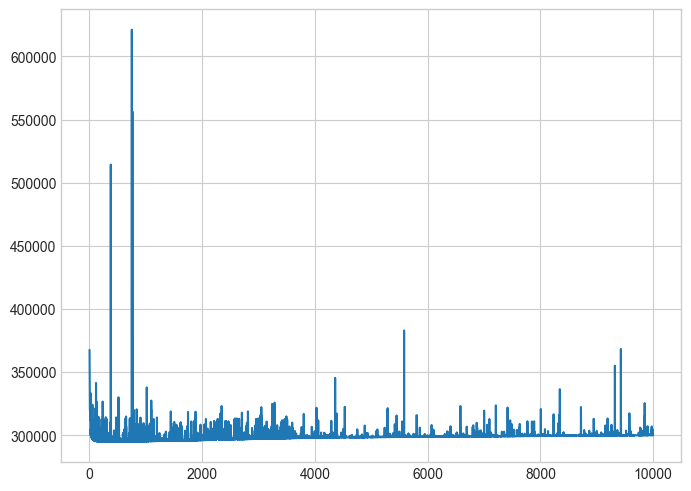

In [16]:
print("Megha Centralised Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Megha Centralised Job Completion Time"]

ax.plot(x, y)
# plt.savefig('Megha_GOOG.pdf')

Megha Distributed Job Completion Time


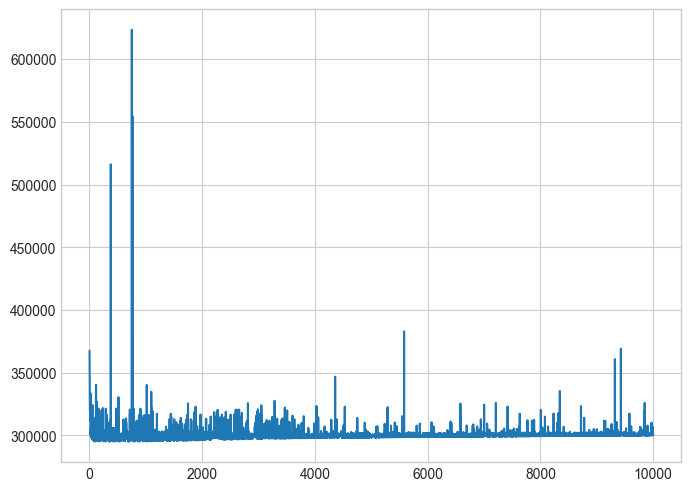

In [17]:
print("Megha Distributed Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Megha Distributed Job Completion Time"]

ax.plot(x, y)

plt.show()

Ideal Job Completion Time


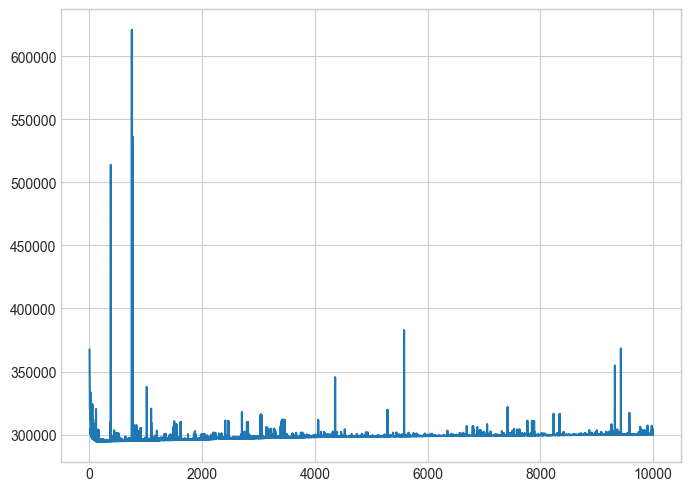

In [18]:
print("Ideal Job Completion Time")

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = plt.axes()

x = final_df.index  # Job ID
y = final_df["Ideal Job Completion Time"]
ax.plot(x, y)

In [19]:
try:
    os.mkdir(OUTPUT_BASE_FILE_PATH / Path(f"{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}"))
except FileExistsError as e:
    path = OUTPUT_BASE_FILE_PATH / Path(f"{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}")
    print(f"Folder: {path} already exists!")

Folder: Only Megha/New_GOOG_sub_trace_10k_1GM_1LM_New_GOOG_sub_trace_10k_4GM_25LM already exists!


In [20]:
final_df.to_csv(OUTPUT_BASE_FILE_PATH / Path(f"{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}") / Path(f"job_completion_times_{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}.csv"))

In [21]:
final_df["Megha Centralised Delay in Job Completion Time"] = final_df["Megha Centralised Job Completion Time"] - final_df["Ideal Job Completion Time"]
final_df["Megha Distributed Delay in Job Completion Time"] = final_df["Megha Distributed Job Completion Time"] - final_df["Ideal Job Completion Time"]

final_df

,Megha Centralised Job Completion Time,Megha Distributed Job Completion Time,Ideal Job Completion Time,Megha Centralised Delay in Job Completion Time,Megha Distributed Delay in Job Completion Time
Job ID,,,,,
1,367531.2015,367531.2015,367531.20,0.0015,0.0015
2,356223.6015,356223.6015,356223.60,0.0015,0.0015
3,330575.6015,330575.6015,330575.60,0.0015,0.0015
4,343415.6015,343415.6015,343415.60,0.0015,0.0015
5,335185.4015,335185.4015,335185.40,0.0015,0.0015
...,...,...,...,...,...
9996,300200.6335,300883.6155,300198.92,1.7135,684.6955
9997,300169.6135,300166.6215,300161.93,7.6835,4.6915
9998,300185.6435,300869.0255,300183.94,1.7035,685.0855


In [22]:
final_df["Megha Centralised Delay in Job Completion Time"].describe()

count    10000.000000
mean       330.535511
std       2032.327788
min          0.001500
25%          0.175500
50%          0.451500
75%          2.005500
max      30803.625500
Name: Megha Centralised Delay in Job Completion Time, dtype: float64

In [23]:
final_df["Megha Distributed Delay in Job Completion Time"].describe()

count    10000.000000
mean      1537.584892
std       2471.363157
min          0.001500
25%        694.371000
50%       1209.399500
75%       1795.470000
max      31198.312500
Name: Megha Distributed Delay in Job Completion Time, dtype: float64

In [24]:
final_df.to_csv(OUTPUT_BASE_FILE_PATH / Path(f"{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}") / Path(f"delay_in_job_completion_times_{CENTRALISED_BASE_FILE_PATH}_{DISTRIBUTED_BASE_FILE_PATH}.csv"))

---